In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Data 

In [2]:
FolderNames = ["BoulangeriePatisserie", "GlacesSorbets", "Fromage", "Electricite"]

df = pd.read_csv(
   "./{}/valeurs_mensuelles.csv".format(FolderNames[0]),
    sep=";",
    skiprows=[1, 2],
    index_col="Libellé",
    parse_dates=["Libellé"])
df.columns = [FolderNames[0],"ToDelete"]
del(df["ToDelete"])


for i,name in enumerate(FolderNames):
    if i>0:
        temp = pd.read_csv(
       "./{}/valeurs_mensuelles.csv".format(name),
        sep=";",
        skiprows=[1, 2],
        index_col="Libellé",
        parse_dates=["Libellé"])
        temp.columns = [FolderNames[i],"ToDelete"]
        del(temp["ToDelete"])
        df = pd.merge(df, temp, on='Libellé')
    
df.head()


,BoulangeriePatisserie,GlacesSorbets,Fromage,Electricite
Libellé,,,,
2019-01-01,104.01,87.15,98.24,123.15
2018-12-01,95.64,37.26,95.97,117.34
2018-11-01,102.27,59.06,97.25,101.31
2018-10-01,111.41,65.15,98.34,91.73
2018-09-01,99.68,77.15,90.37,84.16


# Plots

In [3]:
"""print(sum(dfBP.Date == dfGS.Date))
print(sum(dfGS.Date == dfE.Date))
print(sum(dfE.Date == dfF.Date))
#Les indices de dates sont les mêmes, on peut donc merger les 4 séries sur les dates"""

'print(sum(dfBP.Date == dfGS.Date))\nprint(sum(dfGS.Date == dfE.Date))\nprint(sum(dfE.Date == dfF.Date))\n#Les indices de dates sont les m\xc3\xaames, on peut donc merger les 4 s\xc3\xa9ries sur les dates'

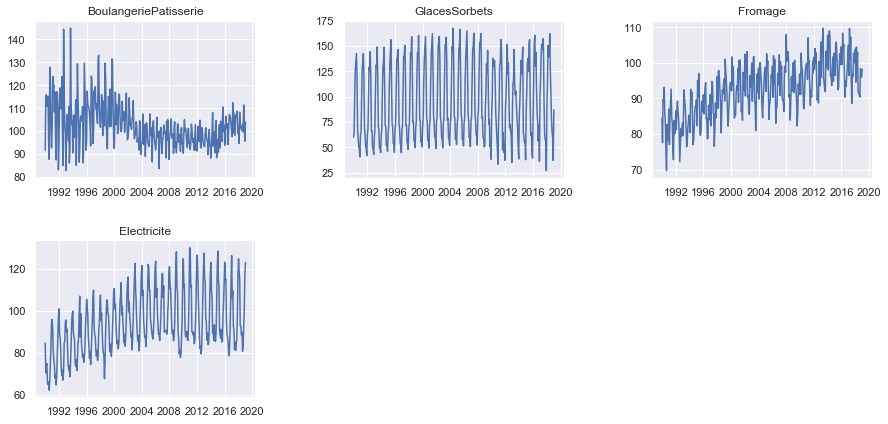

In [4]:
fig = plt.figure(figsize=(15,15))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i,name in enumerate(FolderNames):
    
    X = df.iloc[:,i].dropna()
    ax = fig.add_subplot(4, 3, i+1)
    ax.plot(X)
    ax.set(title=name)

In [5]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

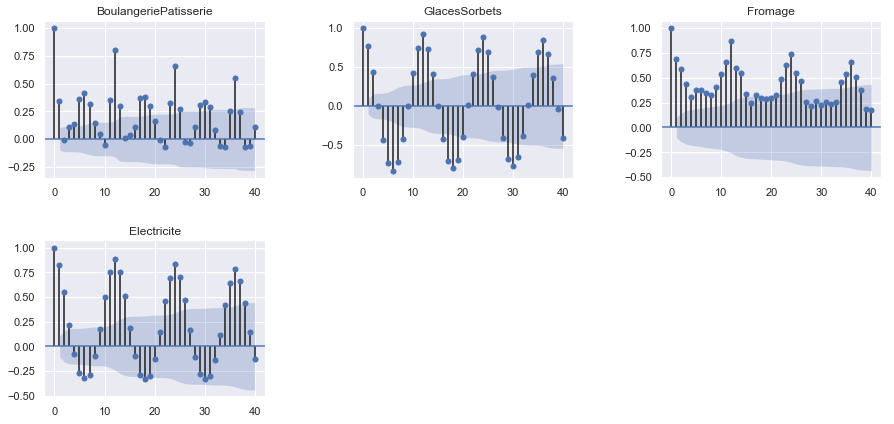

In [6]:
fig = plt.figure(figsize=(15,15))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i,name in enumerate(FolderNames):
    
    ax1 = fig.add_subplot(4,3,i+1)
    fig = plot_acf(df.iloc[:,i].dropna(how="any").values, lags=40, title=name, ax=ax1)